Where ingredients are used and what products they are used in...


##**My new Objective**

Pretty much the same but slightly diff direction


**Objective**  
This project aims to analyze hazardous chemicals in cosmetic products, with a focus on identifying ingredients likely to be reformulated due to safety concerns. By adding quantitative scores for efficacy, safety, and sustainability, the analysis will highlight common hazardous chemicals and assess their impact on product formulation. These insights will provide chemists a useful reference for safer product development and proactive reformulation.

Most cleaned dataset version is the **cleaned_cosmo_chemicals.csv** file btw

In [ ]:
### I would like to add more columns that would be numerical and take Marie's suggestion too.
# But my dataset does not give that info, but I'll try. I feel like it wont be as accurate...

###**Efficacy**: Rate based on known effectiveness of the chemical in the product category (e.g., preservatives, moisturizers).
###**Safety**: Base this on hazard classification (Confirmed Carcinogen, Suspected Carcinogen, etc.), with safer chemicals scoring higher.
###**Sustainability**: Consider factors like environmental impact, biodegradability, or sourcing practices, where sustainable ingredients score higher.

#**Coding starts here**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# cleaned data to use:

df= pd.read_csv("/content/cleaned_cosmo_chemicals.csv")
df.head()

,CSF,CasNumber,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,ProductName,...,BrandName,PrimaryCategory,SubCategory,ChemicalName,HazardType,ReformulationCount,ChemicalAge,AverageChemicalAge,ProductLifespan,ChemicalCategoryCount
0,NaN,13463-67-7,2009-06-17,08/28/2013,2011-02-01,2009-07-09,07/09/2009,NaN,1,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,...,AVON,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,Not Hazardous,0,5606,5606.0,594,64945
1,NaN,65996-92-1,2009-07-01,07/01/2009,NaN,2009-07-01,07/01/2009,NaN,2,Glover's Medicated Shampoo,...,Glover's,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),Distillates (coal tar),Confirmed Carcinogen,0,5614,5613.5,5614,1
2,NaN,140-67-0,2009-07-01,07/01/2009,NaN,2009-07-02,07/02/2009,NaN,2,Glover's Medicated Shampoo,...,Glover's,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),Estragole,Suspected Carcinogen,0,5613,5613.5,5614,32
3,NaN,13463-67-7,2009-07-09,08/28/2013,NaN,2009-07-09,07/09/2009,NaN,1,PRECISION GLIMMER EYE LINER-ALL SHADES �,...,AVON,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,Titanium dioxide,Not Hazardous,0,5606,5606.0,5606,64945
4,NaN,13463-67-7,2009-07-09,08/28/2013,2011-02-01,2009-07-09,07/09/2009,NaN,1,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,...,AVON,Makeup Products (non-permanent),Lip Gloss/Shine,Titanium dioxide,Not Hazardous,0,5606,5606.0,572,64945


- Efficacy: Best-to-worst (higher = better)
- Safety: Worst-to-best (higher = safer)
- Sustainability: Best-to-worst (higher = better)

In [ ]:
# Define the function to set safety scores based on HazardType without randomness
def assign_safety_score(hazard_type):
    if hazard_type == 'Not Hazardous':
        return 10  # Least hazardous
    elif hazard_type == 'Confirmed Carcinogen':
        return 1  # Most hazardous
    elif hazard_type == 'Suspected Carcinogen':
        return 3  # Moderately hazardous
    elif hazard_type == 'Reproductive Toxicant':
        return 2  # Significant hazard
    elif hazard_type == 'Potentially Hazardous':
        return 5  # Moderate hazard
    else:
        return 7  # Default for unspecified hazard

# Define efficacy and sustainability scores for each chemical in hazard_mapping
efficacy_scores = {
    'Titanium dioxide': 6,
    'Distillates (coal tar)': 4,
    'Estragole': 5,
    'Cocamide diethanolamine': 7,
    'Toluene': 3,
    'Chromium (hexavalent compounds)': 3,
    'Retinol': 10,
    'Retinol/retinyl esters, when in daily dosages': 8,
    'Vitamin A': 9,
    'Vitamin A palmitate': 9,
    'Butylated hydroxyanisole': 5,
    'Coffea arabica extract': 8,
    'Lauramide diethanolamine': 6,
    'Coffee': 7,
    'Silica, crystalline (airborne particles of respirable size)': 3,
    'Carbon black (airborne, unbound particles of respirable size)': 4,
    'Carbon black': 4,
    'Genistein (purified)': 7,
    'Progesterone': 6,
    '2,4-Hexadienal (89% trans, trans isomer; 11% cis isomer)': 5,
    'Methyleugenol': 5,
    'Carbon-black extracts': 4,
    'Retinyl palmitate': 9,
    'o-Phenylphenol': 5,
    'Acrylamide': 2,
    'Formaldehyde (gas)': 2,
    'Ginkgo biloba extract': 8,
    'Mica': 7,
    'Ethylene glycol': 6,
    'Acetic acid, retinyl ester': 8,
    'Ethyl acrylate': 3,
    'Trade Secret': 5,
    'Methanol': 6,
    'Mineral oils, untreated and mildly treated': 7,
    'Diethanolamine': 4,
    'TEA-Lauryl Sulfate': 6,
    'Retinyl acetate': 9,
    'Lead acetate': 2,
    'Talc': 7,
    'Triethanolamine': 6,
    'o-Phenylenediamine and its salts': 4,
    'Safrole': 5,
    'Styrene': 5
}

sustainability_scores = {
    'Titanium dioxide': 8,
    'Distillates (coal tar)': 3,
    'Estragole': 6,
    'Cocamide diethanolamine': 7,
    'Toluene': 2,
    'Chromium (hexavalent compounds)': 2,
    'Retinol': 9,
    'Retinol/retinyl esters, when in daily dosages': 7,
    'Vitamin A': 9,
    'Vitamin A palmitate': 8,
    'Butylated hydroxyanisole': 4,
    'Coffea arabica extract': 7,
    'Lauramide diethanolamine': 6,
    'Coffee': 7,
    'Silica, crystalline (airborne particles of respirable size)': 3,
    'Carbon black (airborne, unbound particles of respirable size)': 4,
    'Carbon black': 5,
    'Genistein (purified)': 8,
    'Progesterone': 6,
    '2,4-Hexadienal (89% trans, trans isomer; 11% cis isomer)': 4,
    'Methyleugenol': 5,
    'Carbon-black extracts': 4,
    'Retinyl palmitate': 9,
    'o-Phenylphenol': 6,
    'Acrylamide': 3,
    'Formaldehyde (gas)': 2,
    'Ginkgo biloba extract': 8,
    'Mica': 9,
    'Ethylene glycol': 6,
    'Acetic acid, retinyl ester': 8,
    'Ethyl acrylate': 3,
    'Trade Secret': 5,
    'Methanol': 7,
    'Mineral oils, untreated and mildly treated': 6,
    'Diethanolamine': 4,
    'TEA-Lauryl Sulfate': 6,
    'Retinyl acetate': 8,
    'Lead acetate': 3,
    'Talc': 7,
    'Triethanolamine': 6,
    'o-Phenylenediamine and its salts': 5,
    'Safrole': 5,
    'Styrene': 4
}

In [ ]:
# Add new columns to dataset
df['Efficacy'] = df['ChemicalName'].map(efficacy_scores).fillna(5)
df['Safety'] = df['HazardType'].apply(assign_safety_score)
df['Sustainability'] = df['ChemicalName'].map(sustainability_scores).fillna(5)


print(df[['ChemicalName', 'Efficacy', 'HazardType', 'Safety', 'Sustainability']].head())

             ChemicalName  Efficacy            HazardType  Safety  \
0        Titanium dioxide       6.0         Not Hazardous      10   
1  Distillates (coal tar)       4.0  Confirmed Carcinogen       1   
2               Estragole       5.0  Suspected Carcinogen       3   
3        Titanium dioxide       6.0         Not Hazardous      10   
4        Titanium dioxide       6.0         Not Hazardous      10   

   Sustainability  
0             8.0  
1             3.0  
2             6.0  
3             8.0  
4             8.0  


In [ ]:
## prop 65 (look up for cali standards and make scores more accurate)

In [ ]:
# which risky ingredients to replace with safer, more sustainable ones, supporting safer product formulations...



*   Safety and Hazard: Ingredients marked "Not Hazardous" have high safety scores, while "Confirmed Carcinogens" like coal tar have low safety scores. This shows the safety scores match the hazard levels.

* Efficacy vs. Hazard: More dangerous ingredients have average efficacy scores, which suggests we don’t need them for good performance. They could be swapped out.

* Sustainability for Reformulation: Ingredients like coal tar with low sustainability scores are good candidates for reformulation. Ingredients with high safety and sustainability, like Titanium Dioxide, are safer to keep.



In [ ]:
## some visuals to support this theory

<ipython-input-6-acf2d9c1dca8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='HazardType', y='Safety', data=df, palette='coolwarm')


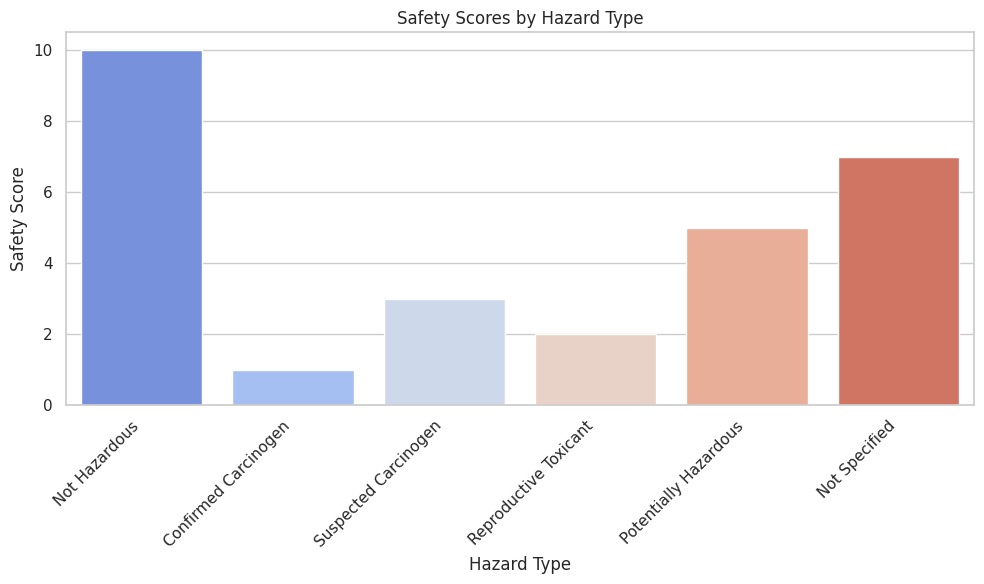

In [ ]:
sns.set(style="whitegrid")

# 1. Safety Scores by Hazard Type (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(x='HazardType', y='Safety', data=df, palette='coolwarm')
plt.title('Safety Scores by Hazard Type')
plt.xlabel('Hazard Type')
plt.ylabel('Safety Score')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

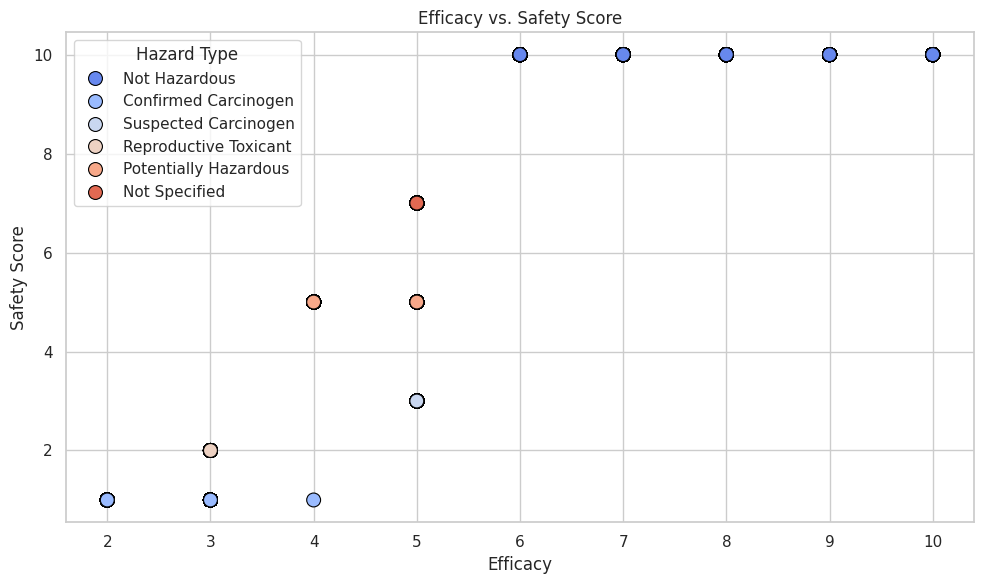

In [ ]:
# 2. Efficacy vs. Safety Score (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Efficacy', y='Safety', hue='HazardType', data=df, palette='coolwarm', s=100, edgecolor='black')
plt.title('Efficacy vs. Safety Score')
plt.xlabel('Efficacy')
plt.ylabel('Safety Score')
plt.legend(title='Hazard Type')
plt.tight_layout()
plt.show()

<ipython-input-8-90b17ce781ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HazardType', y='Sustainability', data=df, palette='coolwarm')


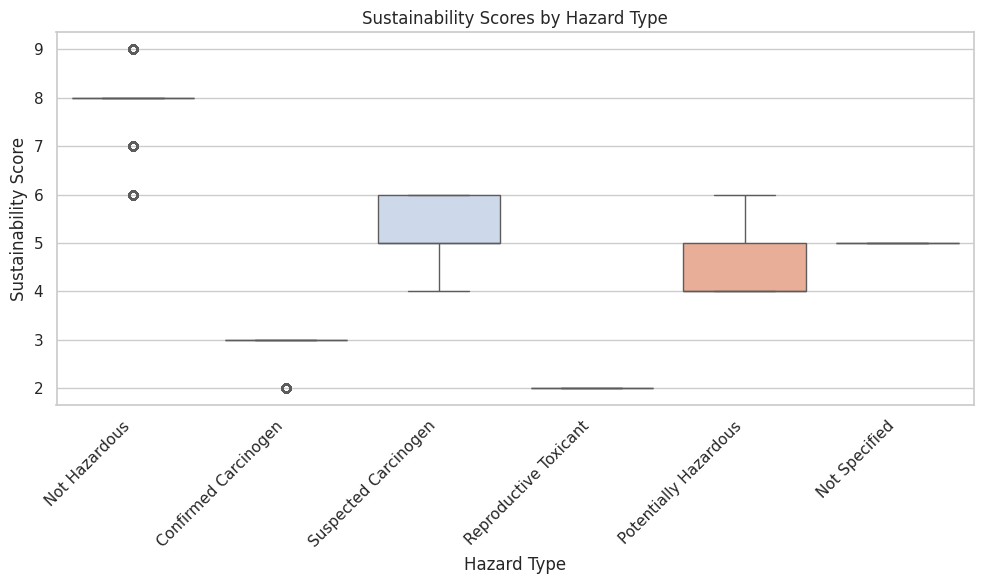

In [ ]:
# 3. Sustainability Scores by Hazard Type (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='HazardType', y='Sustainability', data=df, palette='coolwarm')
plt.title('Sustainability Scores by Hazard Type')
plt.xlabel('Hazard Type')
plt.ylabel('Sustainability Score')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#####**Efficacy and Safety (0.77 correlation):** Chemicals that are more effective tend to also be rated safer. However, this isn’t always the case—some effective chemicals may still have safety concerns.

#####**Efficacy and Sustainability (0.75 correlation):** More effective chemicals are also likely to be more sustainable, though not always. This suggests that effective chemicals can often be sourced or used in a way that is environmentally friendly.

#####**Safety and Sustainability (0.94 correlation):** Chemicals that are safer tend to be more sustainable, likely because non-toxic, biodegradable ingredients also have less environmental impact.

In [ ]:
## Chemicals with higher Safety and Sustainability
# are often more effective as well, making them ideal choices for formulation.

# This means when selecting ingredients,
# it’s beneficial to focus on those that balance high efficacy, safety, and sustainability.

In [ ]:
print(df.head())

   CSF   CasNumber InitialDateReported MostRecentDateReported  \
0  NaN  13463-67-7          2009-06-17             08/28/2013   
1  NaN  65996-92-1          2009-07-01             07/01/2009   
2  NaN    140-67-0          2009-07-01             07/01/2009   
3  NaN  13463-67-7          2009-07-09             08/28/2013   
4  NaN  13463-67-7          2009-07-09             08/28/2013   

  DiscontinuedDate ChemicalCreatedAt ChemicalUpdatedAt ChemicalDateRemoved  \
0       2011-02-01        2009-07-09        07/09/2009                 NaN   
1              NaN        2009-07-01        07/01/2009                 NaN   
2              NaN        2009-07-02        07/02/2009                 NaN   
3              NaN        2009-07-09        07/09/2009                 NaN   
4       2011-02-01        2009-07-09        07/09/2009                 NaN   

   ChemicalCount                                       ProductName  ...  \
0              1  ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADE

In [ ]:
df['WasReformulated'] = df['ChemicalDateRemoved'].notnull().astype(int)


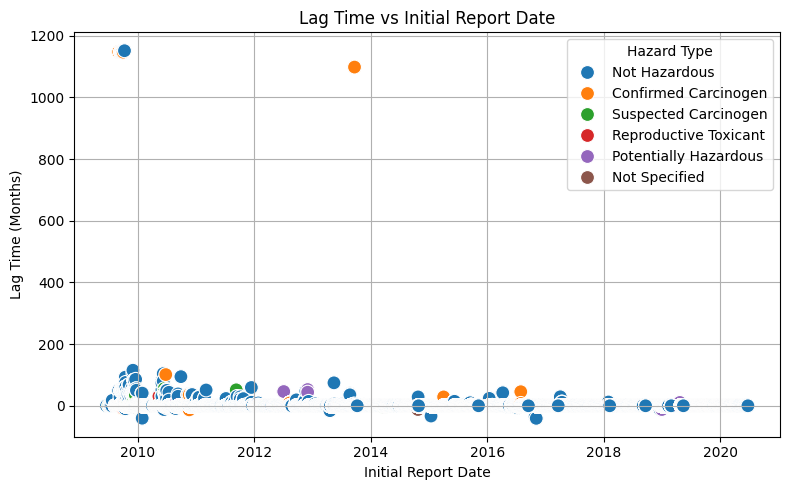

Table of Correlations:
                                    Metric  Correlation (r)
0  Hazard Score ↔ Reformulation Likelihood         0.032254
1      Lag Time ↔ Reformulation Likelihood         0.243022


<ipython-input-7-179d52b941ea>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Correlation (r)", y="Metric", data=correlation_df, palette="Blues_d")


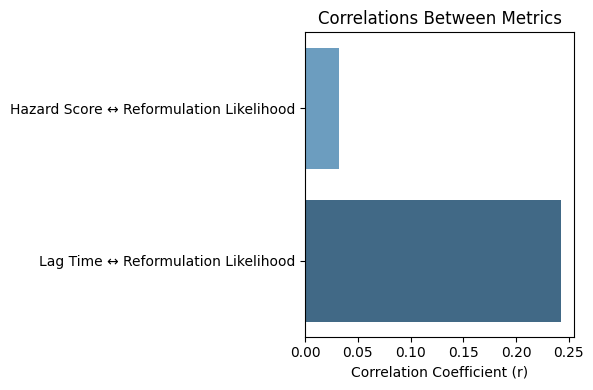

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert dates to datetime format
df["InitialDateReported"] = pd.to_datetime(df["InitialDateReported"])
df["ChemicalUpdatedAt"] = pd.to_datetime(df["ChemicalUpdatedAt"])
df["ChemicalDateRemoved"] = pd.to_datetime(df["ChemicalDateRemoved"])

# Create a HazardScore based on the HazardType
hazard_mapping = {
    "Not Hazardous": 1,
    "Confirmed Carcinogen": 10,
    "Suspected Carcinogen": 8
}

df["HazardScore"] = df["HazardType"].map(hazard_mapping).fillna(0)  # Map the hazard type to numeric scores

# Calculate lag time (in months) between regulation and reformulation
df["LagTimeMonths"] = (df["ChemicalDateRemoved"] - df["InitialDateReported"]).dt.days / 30
df["LagTimeMonths"] = df["LagTimeMonths"].fillna(0)  # Replace NaN with 0 for products not reformulated

# Scatter Plot: Lag time vs. initial report date
plt.figure(figsize=(8, 5))
sns.scatterplot(x="InitialDateReported", y="LagTimeMonths", hue="HazardType", data=df, s=100)
plt.title("Lag Time vs Initial Report Date")
plt.xlabel("Initial Report Date")
plt.ylabel("Lag Time (Months)")
plt.legend(title="Hazard Type")
plt.grid(True)
plt.tight_layout()
plt.show()

# Table of Correlations
correlation_data = {
    "Metric": [
        "Hazard Score ↔ Reformulation Likelihood",
        "Lag Time ↔ Reformulation Likelihood"
    ],
    "Correlation (r)": [
        df["HazardScore"].corr(df["WasReformulated"]),
        df["LagTimeMonths"].corr(df["WasReformulated"]),
    ],
}
correlation_df = pd.DataFrame(correlation_data)

# Display correlation table
print("Table of Correlations:")
print(correlation_df)

# Bar plot for correlations
plt.figure(figsize=(6, 4))
sns.barplot(x="Correlation (r)", y="Metric", data=correlation_df, palette="Blues_d")
plt.title("Correlations Between Metrics")
plt.xlabel("Correlation Coefficient (r)")
plt.ylabel("")
plt.tight_layout()
plt.show()

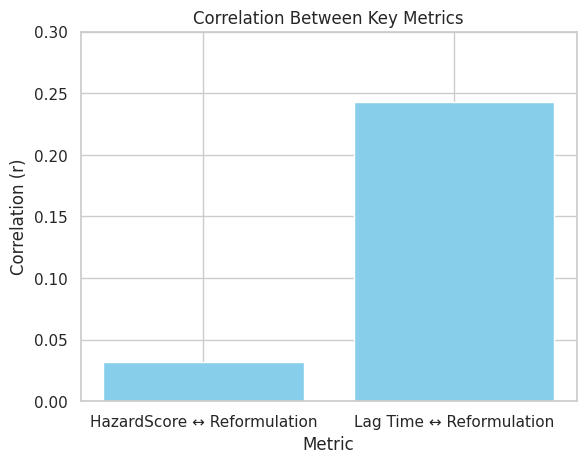

In [ ]:
import matplotlib.pyplot as plt

# Create a list of the correlation values and their labels
metrics = ['HazardScore ↔ Reformulation',   'Lag Time ↔ Reformulation']
correlation_values = [0.032, 0.243]

plt.bar(metrics, correlation_values, color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Correlation (r)')
plt.title('Correlation Between Key Metrics')
plt.ylim(0, 0.3)
plt.show()


<ipython-input-23-f0a6c4c1843b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_carcinogen["LagTimeMonths"] = (df_carcinogen["ChemicalDateRemoved"] - df_carcinogen["InitialDateReported"]).dt.days / 30
<ipython-input-23-f0a6c4c1843b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_carcinogen["LagTimeMonths"] = df_carcinogen["LagTimeMonths"].fillna(0)  # Replace NaN with 0 for products not reformulated


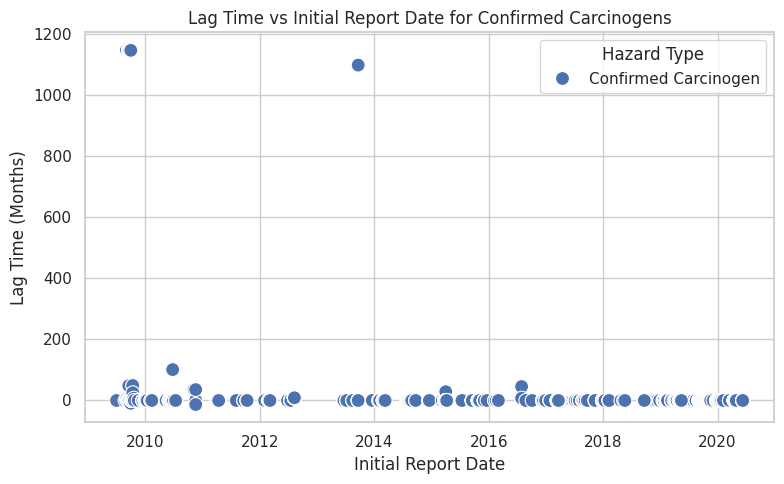

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-23-f0a6c4c1843b>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Correlation (r)", y="Metric", data=correlation_df, palette="Blues_d")


Table of Correlations (Confirmed Carcinogens):
                                    Metric  Correlation (r)
0  Hazard Score ↔ Reformulation Likelihood              NaN
1      Lag Time ↔ Reformulation Likelihood         0.704829


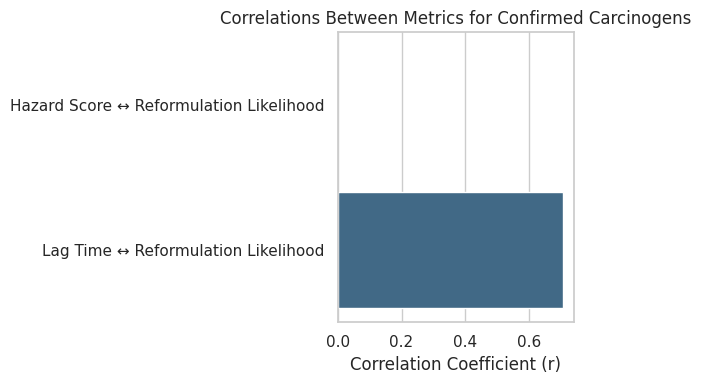

In [ ]:
df["HazardScore"] = df["HazardType"].map(hazard_mapping).fillna(0)  # Map the hazard type to numeric scores

# Filter to include only confirmed carcinogens
df_carcinogen = df[df["HazardType"] == "Confirmed Carcinogen"]

# Calculate lag time (in months) between regulation and reformulation
df_carcinogen["LagTimeMonths"] = (df_carcinogen["ChemicalDateRemoved"] - df_carcinogen["InitialDateReported"]).dt.days / 30
df_carcinogen["LagTimeMonths"] = df_carcinogen["LagTimeMonths"].fillna(0)  # Replace NaN with 0 for products not reformulated

# Scatter Plot: Lag time vs. initial report date
plt.figure(figsize=(8, 5))
sns.scatterplot(x="InitialDateReported", y="LagTimeMonths", hue="HazardType", data=df_carcinogen, s=100)
plt.title("Lag Time vs Initial Report Date for Confirmed Carcinogens")
plt.xlabel("Initial Report Date")
plt.ylabel("Lag Time (Months)")
plt.legend(title="Hazard Type")
plt.grid(True)
plt.tight_layout()
plt.show()

# Table of Correlations (only confirmed carcinogens)
correlation_data = {
    "Metric": [
        "Hazard Score ↔ Reformulation Likelihood",
        "Lag Time ↔ Reformulation Likelihood"
    ],
    "Correlation (r)": [
        df_carcinogen["HazardScore"].corr(df_carcinogen["WasReformulated"]),
        df_carcinogen["LagTimeMonths"].corr(df_carcinogen["WasReformulated"]),
    ],
}
correlation_df = pd.DataFrame(correlation_data)

# Display correlation table
print("Table of Correlations (Confirmed Carcinogens):")
print(correlation_df)

# Bar plot for correlations
plt.figure(figsize=(6, 4))
sns.barplot(x="Correlation (r)", y="Metric", data=correlation_df, palette="Blues_d")
plt.title("Correlations Between Metrics for Confirmed Carcinogens")
plt.xlabel("Correlation Coefficient (r)")
plt.ylabel("")
plt.tight_layout()
plt.show()

<ipython-input-25-263ac89af4c5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Confirmed Carcinogens'], y=[reformulation_rate_carcinogens], palette="Blues_d")


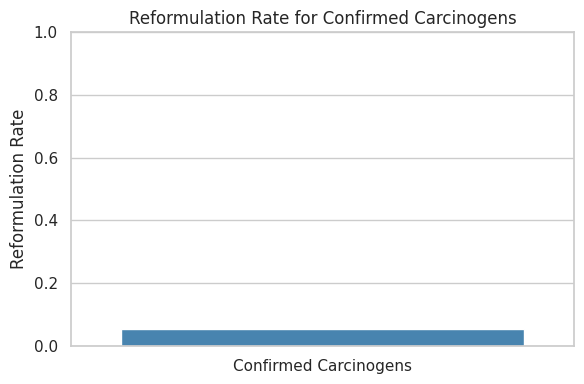

Reformulation rate for confirmed carcinogens: 0.05


In [ ]:
# Calculate the reformulation rate for confirmed carcinogens
reformulated_carcinogens = df_carcinogen[df_carcinogen['HazardType'] == 'Confirmed Carcinogen']
reformulation_rate_carcinogens = reformulated_carcinogens['WasReformulated'].mean()

# Plot the reformulation rate for confirmed carcinogens
plt.figure(figsize=(6, 4))
sns.barplot(x=['Confirmed Carcinogens'], y=[reformulation_rate_carcinogens], palette="Blues_d")
plt.title("Reformulation Rate for Confirmed Carcinogens")
plt.ylabel("Reformulation Rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Display the reformulation rate
print(f"Reformulation rate for confirmed carcinogens: {reformulation_rate_carcinogens:.2f}")


In [ ]:
pd.set_option('display.max_columns', None)
print(df.head())

   CSF   CasNumber InitialDateReported MostRecentDateReported  \
0  NaN  13463-67-7          2009-06-17             08/28/2013   
1  NaN  65996-92-1          2009-07-01             07/01/2009   
2  NaN    140-67-0          2009-07-01             07/01/2009   
3  NaN  13463-67-7          2009-07-09             08/28/2013   
4  NaN  13463-67-7          2009-07-09             08/28/2013   

  DiscontinuedDate ChemicalCreatedAt ChemicalUpdatedAt ChemicalDateRemoved  \
0       2011-02-01        2009-07-09        07/09/2009                 NaN   
1              NaN        2009-07-01        07/01/2009                 NaN   
2              NaN        2009-07-02        07/02/2009                 NaN   
3              NaN        2009-07-09        07/09/2009                 NaN   
4       2011-02-01        2009-07-09        07/09/2009                 NaN   

   ChemicalCount                                       ProductName  \
0              1  ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES   


from sklearn.model_selection import train_test_split

# Assume `df` is your DataFrame and `target_column` is your target variable
# First, split into train and temp (validation + test)
X = df.drop(columns='WasReformulated')  # Features
y = df['WasReformulated']               # Target

# Split 80% train, 20% temporary (to be further split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Now, split the temp data into validation and test (50% validation, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Check the size of splits
print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encode the ChemicalName column
label_encoder = LabelEncoder()
df['ChemicalName_encoded'] = label_encoder.fit_transform(df['ChemicalName'])

df = df.drop(columns=['ChemicalName'])

In [ ]:
# Drop the CasNumber column
#df = df.drop(columns=['CasNumber'])

In [ ]:
pd.set_option('display.max_columns', None)
print(df.head())

   CSF   CasNumber InitialDateReported MostRecentDateReported  \
0  NaN  13463-67-7          2009-06-17             08/28/2013   
1  NaN  65996-92-1          2009-07-01             07/01/2009   
2  NaN    140-67-0          2009-07-01             07/01/2009   
3  NaN  13463-67-7          2009-07-09             08/28/2013   
4  NaN  13463-67-7          2009-07-09             08/28/2013   

  DiscontinuedDate ChemicalCreatedAt ChemicalUpdatedAt ChemicalDateRemoved  \
0       2011-02-01        2009-07-09        2009-07-09                 NaT   
1              NaN        2009-07-01        2009-07-01                 NaT   
2              NaN        2009-07-02        2009-07-02                 NaT   
3              NaN        2009-07-09        2009-07-09                 NaT   
4       2011-02-01        2009-07-09        2009-07-09                 NaT   

   ChemicalCount                                       ProductName  \
0              1  ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES   


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['HazardType_encoded'] = label_encoder.fit_transform(df['HazardType'])


In [ ]:
df = pd.get_dummies(df, columns=['PrimaryCategory', 'SubCategory', 'ProductName'])


In [ ]:
df['InitialDateReported'] = pd.to_datetime(df['InitialDateReported'], errors='coerce')
df['MostRecentDateReported'] = pd.to_datetime(df['MostRecentDateReported'], errors='coerce')

# Create a new feature: days since the product was reported
df['days_since_reported'] = (df['MostRecentDateReported'] - df['InitialDateReported']).dt.days


In [ ]:
# features and target
X = df[['ChemicalAge', 'Efficacy', 'Safety', 'Sustainability', 'days_since_reported', 'ChemicalCount',
        'ProductLifespan', 'ChemicalCategoryCount']]  # Add more features as needed
y = df['WasReformulated']  # Target variable

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_resampled, y_resampled)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Convert categorical variables to numerical values
label_encoder = LabelEncoder()
df['HazardType_encoded'] = label_encoder.fit_transform(df['HazardType'])

# One-hot encoding categorical variables that have no inherent order (like PrimaryCategory)
#df = pd.get_dummies(df, columns=['PrimaryCategory', 'SubCategory', 'ProductName'])

# date columns to datetime
df['InitialDateReported'] = pd.to_datetime(df['InitialDateReported'], errors='coerce')
df['MostRecentDateReported'] = pd.to_datetime(df['MostRecentDateReported'], errors='coerce')

# new feature: days since report
df['days_since_reported'] = (df['MostRecentDateReported'] - df['InitialDateReported']).dt.days

# features and target
X = df[['ChemicalAge', 'Efficacy', 'Safety', 'Sustainability', 'days_since_reported', 'ChemicalCount',
        'ProductLifespan', 'ChemicalCategoryCount']]
y = df['WasReformulated']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22343
           1       1.00      1.00      1.00       584

    accuracy                           1.00     22927
   macro avg       1.00      1.00      1.00     22927
weighted avg       1.00      1.00      1.00     22927

ROC AUC: 1.0


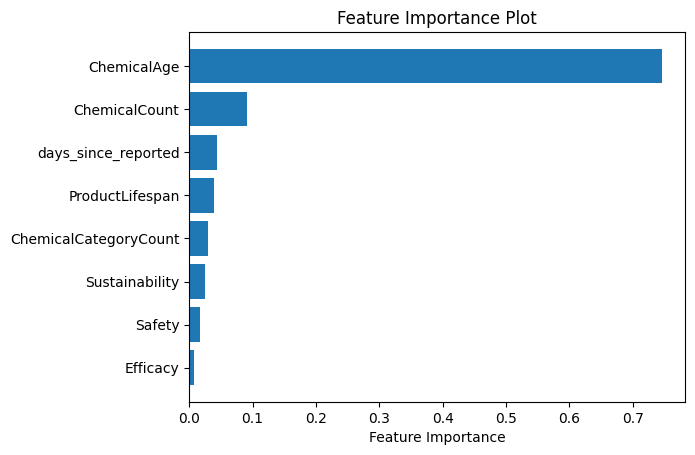

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# For Random Forest
feature_importances = model.feature_importances_
features = X.columns  # Assuming X is the dataframe with your features

# Sort features by importance
sorted_idx = np.argsort(feature_importances)

plt.barh(features[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()


In [ ]:
import numpy as np

# Assuming `model` is the trained RandomForest model and `X` is the dataframe with your features
feature_importances = model.feature_importances_
features = X.columns  # Assuming X is the DataFrame with your features

# Sort features by importance
sorted_idx = np.argsort(feature_importances)

# Print feature names and their corresponding importances
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

for feature, importance in zip(sorted_features, sorted_importances):
    print(f"{feature}: {importance:.4f}")


Efficacy: 0.0073
Safety: 0.0174
Sustainability: 0.0257
ChemicalCategoryCount: 0.0297
ProductLifespan: 0.0389
days_since_reported: 0.0443
ChemicalCount: 0.0912
ChemicalAge: 0.7456


In [1]:
#Filter rows related to "hair" in the 'PrimaryCategory' or 'SubCategory' columns
#hair_subset = df[
    #df['PrimaryCategory'].str.contains('hair', case=False, na=False) |
   # df['SubCategory'].str.contains('hair', case=False, na=False)
#]

# Display the first few rows of the hair-related subset
#print(hair_subset.head())

# Save the subset to a new CSV file if needed
#hair_subset.to_csv("/content/hair_products_subset.csv", index=False)
